# Library

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [76]:
car_dataset = pd.read_csv('car data.csv')
car_dataset.shape

(301, 9)

In [77]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [78]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [79]:
print(car_dataset.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [80]:
print(car_dataset.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [81]:
print(car_dataset.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [82]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [83]:
# We need to replace string value to 1 o
car_dataset.replace({'Fuel_Type': {'Petrol': 0 , 'Diesel': 1,'CNG':2}},inplace = True)

In [84]:
car_dataset.replace({'Transmission': {'Manual': 0 , 'Automatic': 1}},inplace = True)

In [85]:
car_dataset.replace({'Seller_Type': {'Dealer': 0 , 'Individual': 1}},inplace = True)

In [86]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [87]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [88]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state=2)

# Linear Regression Model

In [89]:
linear_model = LinearRegression()

In [90]:
linear_model.fit(X_train,Y_train)

LinearRegression()

In [91]:
linear_prediction = linear_model.predict(X_test)
prediction_train = linear_model.predict(X_train)

Training Result

In [92]:
loss_score_train = metrics.r2_score(Y_train, prediction_train)
print("Training error funcition : ",loss_score_train)

Training error funcition :  0.8799451660493698


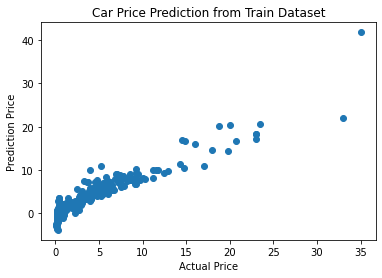

In [93]:
plt.scatter(Y_train,prediction_train)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("Car Price Prediction from Train Dataset")
plt.show()

Testing Result

In [94]:
loss_score = metrics.r2_score(Y_test, linear_prediction)
print("Testing error function : ",loss_score)

Testing error function :  0.8365766715026905


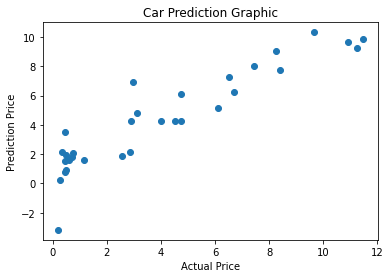

In [95]:
plt.scatter(Y_test,linear_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("Car Prediction Graphic")
plt.show()

# Lasso Regression Model

In [96]:
lasso_model = Lasso()
lasso_model.fit(X_train,Y_train)

Lasso()

Training Dataset

In [97]:
train_predict = lasso_model.predict(X_train)
error_score = metrics.r2_score(Y_train, train_predict)
print("Error Value : ",error_score)

Error Value :  0.8427856123435794


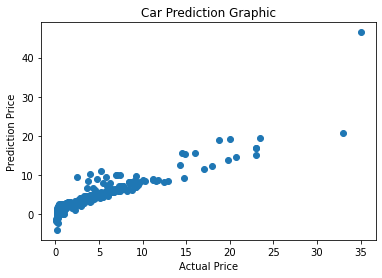

In [98]:
plt.scatter(Y_train,train_predict)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("Car Prediction Graphic")
plt.show()

Testing Dataset

In [99]:
training_predict = lasso_model.predict(X_test)
error_scoring = metrics.r2_score(Y_test, training_predict)
print("Error Value : ",error_scoring)

Error Value :  0.8709167941173195


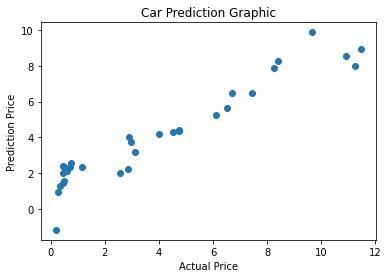

In [100]:
plt.scatter(Y_test,training_predict)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("Car Prediction Graphic")
plt.show()